<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [51]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [52]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

From the information about the columns from kaggle I'm changing the names of the columns to be more intutive.

In [54]:
df.rename({
    'GRADES_PK_G':'NUM_IN_PREKG',
    'GRADES_KG_G':'NUM_IN_KINDER',
    'GRADES_4_G':'NUM_IN_4TH_GRADE',
    'GRADES_8_G':'NUM_IN_8TH_GRADE',
    'GRADES_12_G':'NUM_IN_12TH_GRADE',
    'GRADES_1_8_G':'TOTAL_ENROLLED_IN_PRIMARY',
    'GRADES_9_12_G':'TOTAL_ENROLLED_IN_HS',
    'GRADES_ALL_G':'TOTAL_ENROLLED',
    'ENROLL':'TOTAL_ENROLLED_ESTIMATE'
    },
    axis=1,inplace=True)

In [55]:
#primary key is basically the combination of the columns state and year so we are removing the column "PRIMARY_KEY"
cleaned_df=df.drop(['PRIMARY_KEY'], axis=1)
print(cleaned_df.columns)

Index(['STATE', 'YEAR', 'TOTAL_ENROLLED_ESTIMATE', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_IN_PREKG', 'NUM_IN_KINDER',
       'NUM_IN_4TH_GRADE', 'NUM_IN_8TH_GRADE', 'NUM_IN_12TH_GRADE',
       'TOTAL_ENROLLED_IN_PRIMARY', 'TOTAL_ENROLLED_IN_HS', 'TOTAL_ENROLLED',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_READING_8_SCORE'],
      dtype='object')


The feature we are interested in is the Average reading score of class 4 students.

So we check the number of missing values in the column

In [56]:
cleaned_df["AVG_READING_4_SCORE"].isna().sum()

1065

The column that we are interested in has almost 1065 missing values.

If we fill in this many missing values with mean or median or mode of the data we will skew the data to a large extent.

So we remove the rows that has no value for the 'AVG_READING_4_SCORE' column

In [102]:
cleaned_df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
cleaned_df.dropna(inplace=True)
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 561 to 1223
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         355 non-null    object 
 1   YEAR                          355 non-null    int64  
 2   TOTAL_ENROLLED_ESTIMATE       355 non-null    float64
 3   TOTAL_REVENUE                 355 non-null    float64
 4   FEDERAL_REVENUE               355 non-null    float64
 5   STATE_REVENUE                 355 non-null    float64
 6   LOCAL_REVENUE                 355 non-null    float64
 7   TOTAL_EXPENDITURE             355 non-null    float64
 8   INSTRUCTION_EXPENDITURE       355 non-null    float64
 9   SUPPORT_SERVICES_EXPENDITURE  355 non-null    float64
 10  OTHER_EXPENDITURE             355 non-null    float64
 11  CAPITAL_OUTLAY_EXPENDITURE    355 non-null    float64
 12  NUM_IN_PREKG                  355 non-null    float64
 13  NU

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **Reading for 4th grade**   

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

**For the original dataset**

In [103]:
df["YEAR"].nunique()

33

**For the cleaned dataset**

In [104]:
cleaned_df["YEAR"].nunique()

7

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

**For the original dataset**

In [105]:
group=df.groupby("STATE")
michigan_4th_grade_reading_score=group.get_group("MICHIGAN")["AVG_READING_4_SCORE"].mean()
ohio_4th_grade_reading_score=group.get_group("OHIO")["AVG_READING_4_SCORE"].mean()
print("Michigan's average score for fourth graders taking the NAEP reading exam: ",michigan_4th_grade_reading_score)
print("Ohio's average score for fourth graders taking the NAEP reading exam: ",ohio_4th_grade_reading_score)

Michigan's average score for fourth graders taking the NAEP reading exam:  217.83333333333334
Ohio's average score for fourth graders taking the NAEP reading exam:  223.1818181818182


We see from the output that OHIO has a the higher average predictor score across all years

**For the cleaned dataset**

In [106]:
group=cleaned_df.groupby("STATE")
michigan_4th_grade_reading_score=group.get_group("MICHIGAN")["AVG_READING_4_SCORE"].mean()
ohio_4th_grade_reading_score=group.get_group("OHIO")["AVG_READING_4_SCORE"].mean()
print("Michigan's average score for fourth graders taking the NAEP reading exam: ",michigan_4th_grade_reading_score)
print("Ohio's average score for fourth graders taking the NAEP reading exam: ",ohio_4th_grade_reading_score)

Michigan's average score for fourth graders taking the NAEP reading exam:  218.14285714285714
Ohio's average score for fourth graders taking the NAEP reading exam:  224.14285714285714


Find the average for your pedictor score across all states in 2019

**For the original dataset**

In [115]:
group=df.groupby(["STATE","YEAR"])
for i in df["STATE"].unique():
    print(i,group.get_group((i,2019))["AVG_READING_4_SCORE"].mean())

ALABAMA 212.0
ALASKA 204.0
ARIZONA 216.0
ARKANSAS 215.0
CALIFORNIA 216.0
COLORADO 225.0
CONNECTICUT 224.0
DELAWARE 218.0
DISTRICT_OF_COLUMBIA 214.0
FLORIDA 225.0
GEORGIA 218.0
HAWAII 218.0
IDAHO 223.0
ILLINOIS 218.0
INDIANA 222.0
IOWA 221.0
KANSAS 219.0
KENTUCKY 221.0
LOUISIANA 210.0
MAINE 221.0
MARYLAND 220.0
MASSACHUSETTS 231.0
MICHIGAN 218.0
MINNESOTA 222.0
MISSISSIPPI 219.0
MISSOURI 218.0
MONTANA 222.0
NEBRASKA 222.0
NEVADA 218.0
NEW_HAMPSHIRE 224.0
NEW_JERSEY 227.0
NEW_MEXICO 208.0
NEW_YORK 220.0
NORTH_CAROLINA 221.0
NORTH_DAKOTA 221.0
OHIO 222.0
OKLAHOMA 216.0
OREGON 218.0
PENNSYLVANIA 223.0
RHODE_ISLAND 220.0
SOUTH_CAROLINA 216.0
SOUTH_DAKOTA 222.0
TENNESSEE 219.0
TEXAS 216.0
UTAH 225.0
VERMONT 222.0
VIRGINIA 224.0
WASHINGTON 220.0
WEST_VIRGINIA 213.0
WISCONSIN 220.0
WYOMING 227.0
DODEA 235.0
NATIONAL 220.0


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

**For the original dataset**

In [64]:
group=df.groupby("STATE")["AVG_READING_4_SCORE"].max()
print(group)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

**For the cleaned dataset**

In [65]:
group=cleaned_df.groupby("STATE")["AVG_READING_4_SCORE"].max()
print(group)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 215.0
ARKANSAS                219.0
CALIFORNIA              213.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    212.0
FLORIDA                 227.0
GEORGIA                 222.0
HAWAII                  215.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             214.0
MISSOURI                224.0
MONTANA                 227.0
NEBRASKA                227.0
NEVADA                  214.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              231.0
NEW_MEXICO              212.0
NEW_YORK                224.0
NORT

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [66]:
cleaned_df.corr()

,YEAR,TOTAL_ENROLLED_ESTIMATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,NUM_IN_4TH_GRADE,NUM_IN_8TH_GRADE,NUM_IN_12TH_GRADE,TOTAL_ENROLLED_IN_PRIMARY,TOTAL_ENROLLED_IN_HS,TOTAL_ENROLLED,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,1.000000,-0.015314,0.074545,0.082366,0.056791,0.084071,0.065000,0.077318,0.080334,0.068537,...,-0.005796,-0.025348,0.017019,-0.011034,-0.011126,-0.009205,0.332133,0.258601,0.208932,0.207188
TOTAL_ENROLLED_ESTIMATE,-0.015314,1.000000,0.940688,0.953046,0.936003,0.866948,0.943594,0.897082,0.948572,0.976054,...,0.998722,0.998956,0.989407,0.999066,0.997715,0.999518,-0.014968,-0.043261,-0.051627,-0.112736
TOTAL_REVENUE,0.074545,0.940688,1.000000,0.920766,0.971510,0.964275,0.999075,0.988895,0.994445,0.941214,...,0.934486,0.936664,0.946858,0.934290,0.945823,0.939751,0.064045,0.040346,0.049732,-0.011189
FEDERAL_REVENUE,0.082366,0.953046,0.920766,1.000000,0.919437,0.830976,0.920694,0.878698,0.924303,0.954431,...,0.951680,0.948299,0.959721,0.950603,0.955259,0.952218,-0.041481,-0.065495,-0.095399,-0.141952
STATE_REVENUE,0.056791,0.936003,0.971510,0.919437,1.000000,0.877020,0.969901,0.952168,0.966262,0.942671,...,0.928967,0.933368,0.951854,0.928415,0.945752,0.933367,0.025687,-0.004011,-0.008202,-0.065528
LOCAL_REVENUE,0.084071,0.866948,0.964275,0.830976,0.877020,1.000000,0.963903,0.968711,0.956913,0.861296,...,0.861011,0.862056,0.863133,0.861365,0.867828,0.867709,0.118781,0.102867,0.133112,0.070512
TOTAL_EXPENDITURE,0.065000,0.943594,0.999075,0.920694,0.969901,0.963903,1.000000,0.989244,0.993013,0.941769,...,0.937332,0.939274,0.947142,0.937155,0.947626,0.942548,0.059103,0.036923,0.045667,-0.016395
INSTRUCTION_EXPENDITURE,0.077318,0.897082,0.988895,0.878698,0.952168,0.968711,0.989244,1.000000,0.973395,0.896064,...,0.888982,0.892087,0.900579,0.889053,0.901358,0.895522,0.069731,0.046886,0.072567,0.007060
SUPPORT_SERVICES_EXPENDITURE,0.080334,0.948572,0.994445,0.924303,0.966262,0.956913,0.993013,0.973395,1.000000,0.949354,...,0.942405,0.944723,0.956452,0.942147,0.953852,0.947412,0.062900,0.040822,0.048620,-0.008174
OTHER_EXPENDITURE,0.068537,0.976054,0.941214,0.954431,0.942671,0.861296,0.941769,0.896064,0.949354,1.000000,...,0.974727,0.973754,0.979821,0.974401,0.978478,0.975790,0.016915,-0.026509,-0.025062,-0.093728


Final feature list: 'STATE', 'YEAR',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_IN_PREKG', 'NUM_IN_KINDER',
       'NUM_IN_4TH_GRADE', 'NUM_IN_8TH_GRADE', 'NUM_IN_12TH_GRADE',
       'TOTAL_ENROLLED_IN_PRIMARY', 'TOTAL_ENROLLED_IN_HS',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_8_SCORE'

Feature selection justification: Intutively,we know that as we are going to predict the Average reading score in 4th grade.
The total enrolled,total expenditure,total revenue are the result of linear combinations of other columns so we remove them.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='YEAR', ylabel='AVG_READING_4_SCORE'>

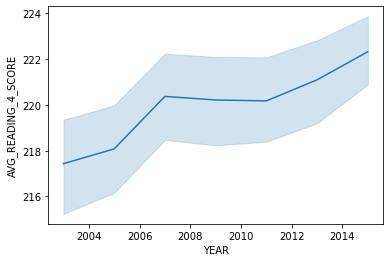

In [67]:
sns.lineplot(data=cleaned_df, x="YEAR", y="AVG_READING_4_SCORE")

**HOW THE AVERAGE READING SCORE OF CLASS 4 STUDENTS VARIED OVER THE YEARS**

**Visualization 2**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_READING_4_SCORE'>

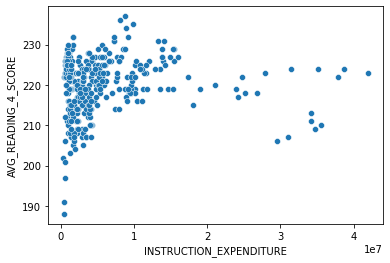

In [68]:
sns.scatterplot(data=cleaned_df, x="INSTRUCTION_EXPENDITURE", y="AVG_READING_4_SCORE")


**How the instruction expenditure influences the average reading score of class 4 students**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [69]:
from sklearn.model_selection import train_test_split

In [85]:
X = cleaned_df[['YEAR',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_IN_PREKG', 'NUM_IN_KINDER',
       'NUM_IN_4TH_GRADE', 'NUM_IN_8TH_GRADE', 'NUM_IN_12TH_GRADE',
       'TOTAL_ENROLLED_IN_PRIMARY', 'TOTAL_ENROLLED_IN_HS',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_8_SCORE']]
y = cleaned_df["AVG_READING_4_SCORE"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, random_state=0)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

Regression

In [120]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [121]:
# create your model here
from sklearn.linear_model import Ridge
model = Ridge(alpha=1).fit(X_train_scaled, y_train)


In [122]:
y_pred = model.predict(X_test_scaled)

In [123]:
# # FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG_READING_4_SCORE')

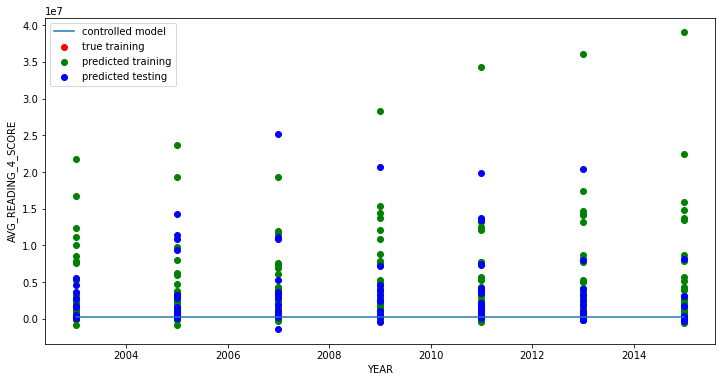

In [124]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "YEAR"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_READING_4_SCORE")

<h2> Summary </h2>

From the correlation plot we were able to see that not a lot of features were directly related to the predictor.
The number of missing data in some columns is greater than the number of data present in the column for such rows imputing the missing values will lead to skewed biased models.
The data is too sparse to construct a reliable model.

From the summary we can understand that as we created a linear regression with ridge regularization almost all features have similar effect on the predictor.
We have achieved a 0.899 training score and 0.859 testing score this means that our model is generalising well.


In [125]:
print('linear model coeff (w): {}'
     .format(model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test_scaled, y_test)))

linear model coeff (w): [-0.26094293 -0.7920962  -1.44504185 -0.15975875  1.68407943  0.53748908
  1.09312718  0.4688686  -0.40624373 -0.10387526 -0.29352583 -0.43844838
 -2.44279977  0.17009804  2.13511277  4.95808432 -2.88636891  4.53834601]
linear model intercept (b): 220.075
R-squared score (training): 0.899
R-squared score (test): 0.859
